In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA,KernelPCA

from sklearn.metrics import fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import linear_model
import sweetviz as sv


In [36]:
# Obtain the data for linear regression

x_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')



data = pd.concat([x_train,y_train.Expected],1)# adding result here remove later step
#Test = pd.read_csv('data/X_test.csv')
#y_train = pd.read_csv('data/y_train.csv')

class_1 = np.where(y_train.Expected == 1)
class_0 = np.where(y_train.Expected == 0)

class_1 = pd.DataFrame(data,index=class_1[0], columns=data.columns)
class_0 = pd.DataFrame(data,index=class_0[0], columns=data.columns)


class_0 = class_0.sample(n = len(class_1))

frames = [class_1, class_0]

result = pd.concat(frames)

x_train = result.sample(n = len(result))#randomise

#train_report = sv.analyze(x_train)
#train_report.show_html("train_report.html",open_browser=True)


x_train.drop('Id', inplace=True, axis=1)
y_train = x_train['Expected']
x_train.drop('Expected', inplace=True, axis=1) # we delete the result
#x_train = pd.get_dummies(x_train)
#print("isnasum ",x_train.isna().sum())
x_train = x_train.fillna(x_train.median())

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.5, random_state=42)


train_res = y_train 
test_res = y_test

#train_data, test_data, train_res, test_res


C:\Users\Schmidtlacus\AppData\Local\Temp\ipykernel_10952\1553505078.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([x_train,y_train.Expected],1)# adding result here remove later step


In [37]:
unknown = pd.read_csv('data/X_test.csv')
unknown.drop('Id', inplace=True, axis=1)
#unknown = pd.get_dummies(unknown)
unknown = unknown.fillna(unknown.median())

In [45]:
print(len(x_train.columns))
#print(x_train.columns)
#does the same as next
#x_train.nunique()
#print("isnasum ",x_train.isna().sum())
headers = []

for col in x_train.columns:
	if "000" in col:
		print(col,(x_train[col] == 0).sum())
		#print(col)
		continue
	if (x_train[col] == 0).sum() < len(x_train)/2:
		#print(col,(x_train[col] == 0).sum(),len(x_train[col].value_counts()))
		headers.append(col)

#for col in x_train.columns:
#	if len(x_train[col].value_counts()) < len(x_train)/2:
#		headers.append(col)
		#print(col,len(x_train[col].value_counts()))


train_data = x_train[headers]
test_data = x_test[headers]

print(len(headers))

unknown_data = unknown[headers]


170
aa_000 5
ab_000 672
ac_000 99
ad_000 18
ae_000 701
af_000 701
ag_000 677
ah_000 3
ai_000 428
aj_000 491
ak_000 705
al_000 266
an_000 2
ao_000 2
ap_000 2
aq_000 4
ar_000 612
as_000 716
at_000 596
au_000 707
av_000 121
ax_000 122
ay_000 693
az_000 25
ba_000 25
bb_000 2
bc_000 136
bd_000 32
be_000 49
bf_000 208
bg_000 3
bh_000 2
bi_000 2
bj_000 3
bk_000 4
bl_000 5
bm_000 7
bn_000 8
bo_000 8
bp_000 9
bq_000 9
br_000 9
bs_000 2
bt_000 2
bu_000 2
bv_000 2
bx_000 0
by_000 26
bz_000 89
ca_000 2
cb_000 2
cc_000 20
cd_000 0
ce_000 197
cf_000 526
cg_000 26
ch_000 721
ci_000 2
cj_000 520
ck_000 1
cl_000 470
cm_000 240
cn_000 532
co_000 92
cp_000 143
cq_000 2
cr_000 716
cs_000 25
ct_000 23
cu_000 20
cv_000 14
cx_000 19
cy_000 611
cz_000 74
da_000 714
db_000 605
dc_000 14
dd_000 13
de_000 12
df_000 695
dg_000 688
dh_000 629
di_000 604
dj_000 721
dk_000 719
dl_000 720
dm_000 719
dn_000 2
do_000 97
dp_000 96
dq_000 559
dr_000 559
ds_000 21
dt_000 21
du_000 27
dv_000 27
dx_000 512
dy_000 484
dz_000

In [9]:
train_data = x_train
test_data = x_test
unknown_data = unknown

In [41]:

#for i in train_res.values:
#	print(i)

#train_res.loc(train_res["Expected"]==1)



for col in train_data.columns:
	#if len(train_data[col].value_counts()) < len(train_data):
		#headers.append(col)
	print(col,len(train_data[col].value_counts()))



#y_train.Expected
#y_train.nunique()
print(train_res.value_counts())
print(test_res.value_counts())


ag_003 355
ag_004 643
ag_005 681
ag_006 686
ag_007 572
ag_008 494
am_0 421
ay_006 499
ay_007 638
ay_008 658
az_001 581
az_002 610
az_003 651
az_004 677
az_005 689
az_006 446
ba_001 681
ba_002 667
ba_003 666
ba_004 656
ba_005 647
ba_006 652
ba_007 608
ba_008 465
ba_009 360
cn_002 488
cn_003 673
cn_004 689
cn_005 683
cn_006 659
cn_007 596
cn_008 540
cn_009 357
cs_001 525
cs_002 632
cs_003 664
cs_004 679
cs_005 688
cs_006 688
cs_007 555
cs_008 165
ec_00 496
ee_001 682
ee_002 669
ee_003 652
ee_004 649
ee_005 644
ee_006 633
ee_007 612
ee_008 553
1    362
0    360
Name: Expected, dtype: int64
0    362
1    360
Name: Expected, dtype: int64


0.9002770083102493
0.9002148557397176
Error: 72
0.9101382488479263
precision 0.9186046511627907
recall 0.8777777777777778


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


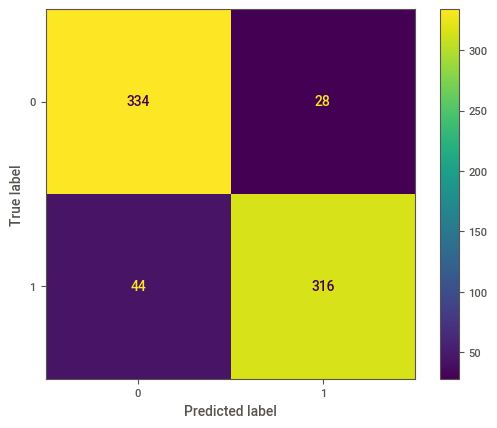

In [42]:

clf_dtc = DTC(random_state=42,criterion = "entropy",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss #gini
clf_dtc.fit(train_data,train_res)
predicted_Y = clf_dtc.predict(test_data)
Y_test_proba = clf_dtc.predict_proba(test_data)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]

print(acc(test_res,predicted_Y))

print(bas(test_res,predicted_Y))
pcm(clf_dtc,test_data,test_res)
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error:",error)
print(fbeta_score(test_res, predicted_Y, average='binary', beta=0.5))
print("precision",precision_score(test_res,predicted_Y))
print("recall",recall_score(test_res,predicted_Y))

#predicted_Y = clf.predict(Test)


0.8808864265927978
0.8806936771025169


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


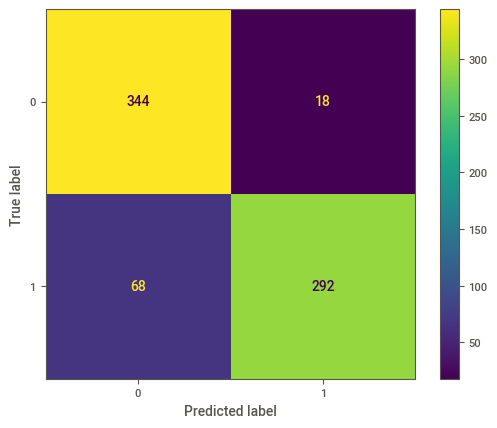

In [44]:
clf_knc = KNeighborsClassifier(2) 
#DTC(random_state=42,criterion = "gini",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss

clf_knc.fit(train_data,train_res)
predicted_Y = clf_knc.predict(test_data)
Y_test_proba = clf_knc.predict_proba(test_data)[:,1]


#predicted_Y = [ i>0.2 for i in Y_test_proba]


print(acc(test_res,predicted_Y))

print(bas(test_res,predicted_Y))
pcm(clf_knc,test_data,test_res)
#predicted_Y = clf.predict(Test)

0.9556786703601108
0.9552561185586029


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


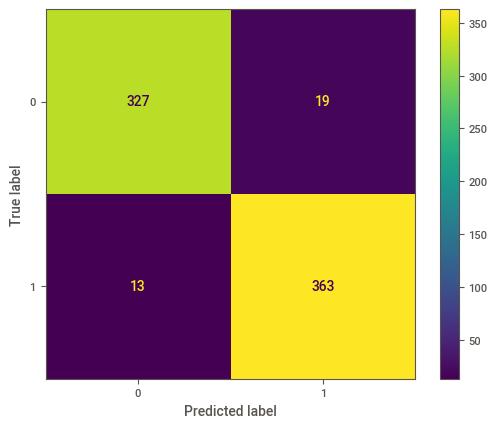

In [34]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(train_data,train_res)
predicted_Y = clf.predict(test_data)
Y_test_proba = clf.predict_proba(test_data)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]


print(acc(test_res,predicted_Y))

print(bas(test_res,predicted_Y))
pcm(clf,test_data,test_res)
predicted_Y = clf.predict(unknown_data)

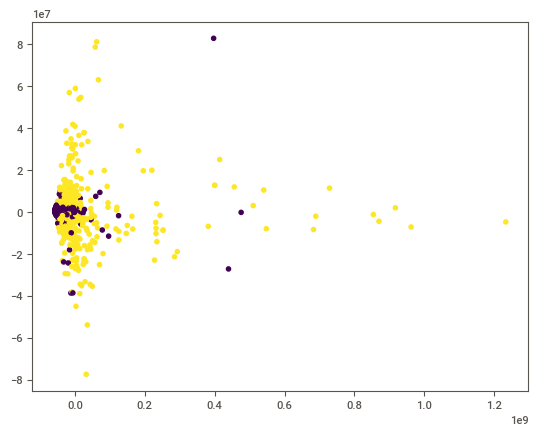

0.9487534626038782
0.9480306850325914


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


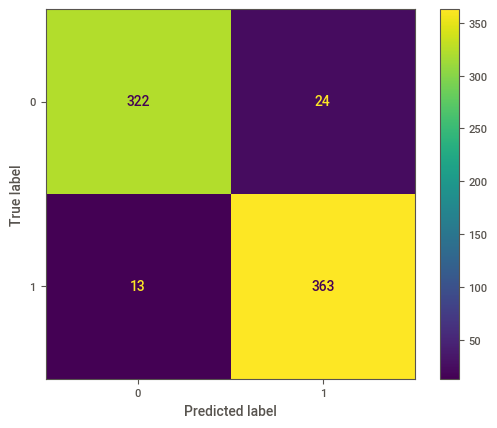

In [31]:
pca = PCA(n_components=50)
pca = pca.fit(train_data)
train_pca = pca.transform(train_data)

test_pca = pca.transform(test_data)

#Real_pca = pca.transform(Test)

#reg = linear_model.BayesianRidge()

#plt.scatter(train_pca)
plt.scatter(train_pca[:,1],train_pca[:,6],c=train_res)
plt.show()

#clf = DTC(random_state=42,criterion = "gini",min_samples_split = 100,max_features = "sqrt")#"entropy"  #log_loss
#clf = clf.fit(train_pca,test_res)
#reg = reg.fit(train_pca,y_train)

#print(reg.coef_)

#predicted_Y = clf.predict(test_pca)
#predicted_Y = reg.predict(test_pca)
#Y_test_proba = clf.predict_proba(test_pca)[:,1]


#print(acc(test_res,predicted_Y))

#print(bas(test_res,predicted_Y,adjusted=True))
#print(bas(test_res,predicted_Y,adjusted=False))

#pcm(clf,train_pca,y_train)


clf = RandomForestClassifier(n_estimators=20)
clf.fit(train_pca,train_res)
predicted_Y = clf.predict(test_pca)
Y_test_proba = clf.predict_proba(test_pca)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]


print(acc(test_res,predicted_Y))

print(bas(test_res,predicted_Y))
pcm(clf,test_pca,test_res)

Real_pca = pca.transform(unknown_data)

predicted_Y = clf.predict(Real_pca)



In [33]:
clf_dtc = GaussianNB()

clf_dtc.fit(train_data,train_res)
predicted_Y = clf_dtc.predict(test_data)
Y_test_proba = clf_dtc.predict_proba(test_data)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]

print(acc(test_res,predicted_Y))

print(bas(test_res,predicted_Y))
pcm(clf_dtc,test_data,test_res)
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error:",error)
print(fbeta_score(test_res, predicted_Y, average='binary', beta=0.5))
print("precision",precision_score(test_res,predicted_Y))
print("recall",recall_score(test_res,predicted_Y))

#predicted_Y = clf.predict(Test)





FloatingPointError: underflow encountered in exp

In [ ]:
#predicted_Y = clf.predict(Real_pca)
print(len(predicted_Y), sum(predicted_Y))

In [35]:
len(predicted_Y)

f = open("schmidt_laszlo_pca_random_forest_removed_zeroes.csv",'w')

f.write("Id,Predicted\n")
for i,val in enumerate(predicted_Y):
	f.write("{},{}\n".format(i,val))

f.flush()
f.close()

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(train)
a = pca.transform(train)
print(pca.explained_variance_ratio_)

print(len(train),",",len(a))
#plt.scatter(a,y_test)
#plt.show()

